# Extract UMAPs for plotting with SCANPY

In [1]:
library(Seurat)
library(dplyr)
library(RColorBrewer)
library(destiny, quietly = TRUE)
library(gam)
library(harmony)
library(ggplot2)
library(pheatmap)
library(cowplot)
library(SoupX)

luz_colors = c('#c466b0', 
               '#779eed', '#aad3f2', '#71a2c7', '#60bddb',   '#70ccbe', 
               '#7b9e99', '#91bd80', '#bdb380',  '#d4db81', '#ebd3c3',  '#dba781', 
               '#e08b8b', '#edb7b7', '#d9abb7', '#d96884', '#e64e74', '#d9a5c3', '#cc8fdb')

colors = c(luz_colors, 
           brewer.pal(n=12, name = 'Paired'), 
           brewer.pal(n=8, name = 'Set2'),
          brewer.pal(n=8, name = 'Set3'),
          brewer.pal(n=8, name = 'Accent'),
          brewer.pal(n=8, name = 'Pastel1'))

def_colors = list( reds = luz_colors[13:length(luz_colors) ],
                 yellows = luz_colors[7:12],
                 blues = luz_colors[2:6],
                 greys = c('#e8e8e8', '#b5b5b5', '#a6a6a6') )

col_dot = c('grey90',  brewer.pal(n = 9, name = 'Reds')[7])



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: splines

Loading required package: foreach

Loaded gam 1.20


Loading required package: Rcpp



In [2]:
plot_all_meta = function(anndataO, output = 'round1'){
    p1 = DimPlot(anndataO, reduction = "umap", label = F, pt.size =0.2, cols = colors, label.size = 6) + 
            ggtitle(paste0('n = ', ncol(anndataO)))+ 
            theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
                 axis.text.x = element_blank(),
                 axis.ticks.x = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.text=element_text(size=24),
                axis.title=element_text(size=24), 
                legend.text=element_text(size=20),
                 plot.title = element_text(size = 24))

    p2 = DimPlot(anndataO, reduction = "umap", group.by = 'seurat_clusters', label = T, cols = colors, pt.size =0.2, label.size=9) + ggtitle('louvain')+ 
            theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
                 axis.text.x = element_blank(),
                 axis.ticks.x = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.text=element_text(size=24),
                axis.title=element_text(size=24), 
                legend.text=element_text(size=20),
                 plot.title = element_text(size = 24)) + NoLegend()

    p3 = DimPlot(anndataO, reduction = "umap", group.by = 'sex', pt.size =0.2, cols = c('#f5829f', '#71a2c7')) + ggtitle('sex')+ 
            theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
                 axis.text.x = element_blank(),
                 axis.ticks.x = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.text=element_text(size=24),
                axis.title=element_text(size=24), 
                legend.text=element_text(size=20),
                 plot.title = element_text(size = 24)) + NoLegend()

    p4 = DimPlot(anndataO, reduction = "umap", group.by = 'individual', label = F, cols = colors, pt.size =0.2) + ggtitle('individual')+ 
            theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
                 axis.text.x = element_blank(),
                 axis.ticks.x = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.text=element_text(size=24),
                axis.title=element_text(size=24), 
                legend.text=element_text(size=20),
                 plot.title = element_text(size = 24))+ NoLegend()

    p5 = FeaturePlot(anndataO, reduction = "umap", features = 'PCW', pt.size =0.2) + 
        ggtitle('PCWs') + 
            theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
                 axis.text.x = element_blank(),
                 axis.ticks.x = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.text=element_text(size=24),
                axis.title=element_text(size=24), 
                legend.text=element_text(size=20),
                 plot.title = element_text(size = 24)) + NoLegend()

    p6 = DimPlot(anndataO, reduction = "umap", group.by = 'Phase', pt.size =0.2) + ggtitle('cell cycle phase')+ 
            theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
                 axis.text.x = element_blank(),
                 axis.ticks.x = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.text=element_text(size=24),
                axis.title=element_text(size=24), 
                legend.text=element_text(size=20),
                 plot.title = element_text(size = 24))+ NoLegend()

    p7 = FeaturePlot(anndataO, reduction = "umap", features =  'scrublet.score', pt.size =0.2) + ggtitle('scrublet score')+ 
            theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
                 axis.text.x = element_blank(),
                 axis.ticks.x = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.text=element_text(size=24),
                axis.title=element_text(size=24), 
                legend.text=element_text(size=20),
                 plot.title = element_text(size = 24)) + NoLegend()

    p8 = FeaturePlot(anndataO, reduction = "umap", features =  'nCount_RNA' , pt.size =0.2) + 
            ggtitle('number of counts')+ 
            theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
                 axis.text.x = element_blank(),
                 axis.ticks.x = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.text=element_text(size=24),
                axis.title=element_text(size=24), 
                legend.text=element_text(size=20),
                 plot.title = element_text(size = 24)) 
    if(output == 'round2')
        PP = plot_grid(p1+ NoLegend(), p1, p2,  p3, p4,  p5, ncol = 6)
    if(output == 'round1')
        PP = plot_grid(p1+ NoLegend(), p1, p2,  p4,  p6, p7, p8+ NoLegend(), ncol = 7)
    if(output == 'all')
        PP = plot_grid(p1+ NoLegend(), p1, p2, p3, p4, p5, p6, p7, p8, ncol = 9)
    return(PP)
}

In [3]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS:   /home/jovyan/my-conda-envs/R_Seurat3/lib/libblas.so.3.8.0
LAPACK: /home/jovyan/my-conda-envs/R_Seurat3/lib/liblapack.so.3.8.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] splines   stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] SoupX_1.5.0        cowplot_1.1.1      pheatmap_1.0.12    ggplot2_3.3.3     
 [5] harmony_1.0        Rcpp_1.0.6         gam_1.20           foreach_1.5.1     
 [9] destiny_3.4.0      RColorBrewer_1.1-2 dplyr_1.0.5        Seurat_3.

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


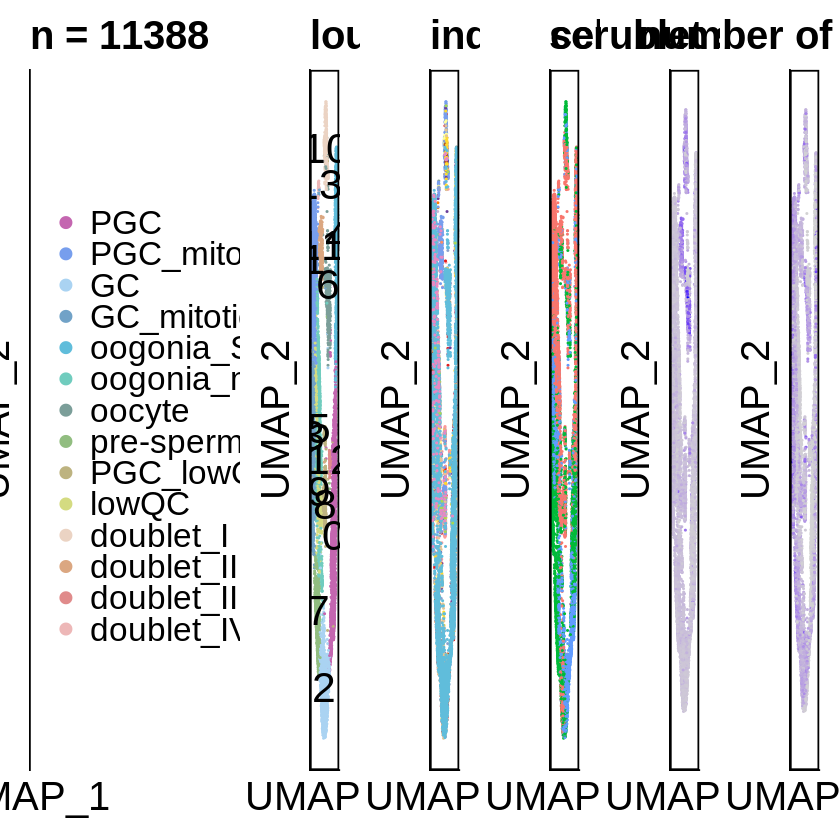

In [4]:
# Germ cells A
anndataO = readRDS('/nfs/team292/lg18/with_valentina/germcells_doublets.rds')
plot_all_meta(anndataO)
ggsave(filename = paste0('figures_manual_annotation/FS1_germcellsA.pdf'), dpi = 75, width = 32, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_germcellsA.png'), dpi = 300, width = 32, height = 5)

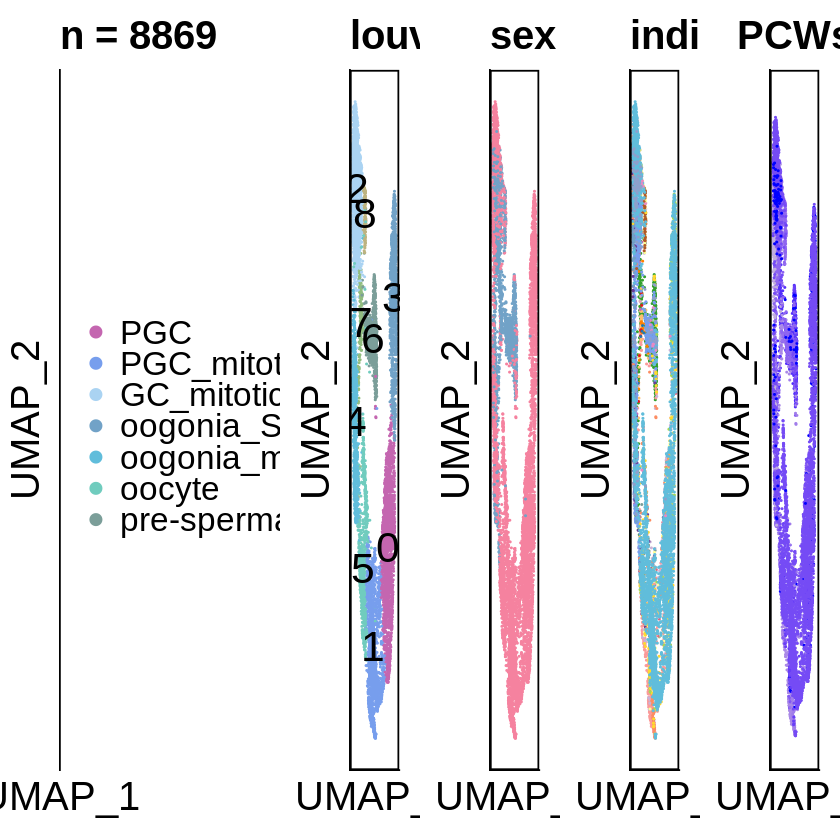

In [18]:
# Germ cells b
anndataO = readRDS('/nfs/team292/lg18/with_valentina/germcells.rds')
plot_all_meta(anndataO, output = 'round2')
ggsave(filename = paste0('figures_manual_annotation/FS1_germcellsB.pdf'), dpi = 75, width = 27, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_germcellsB.png'), dpi = 300, width = 27, height = 5)

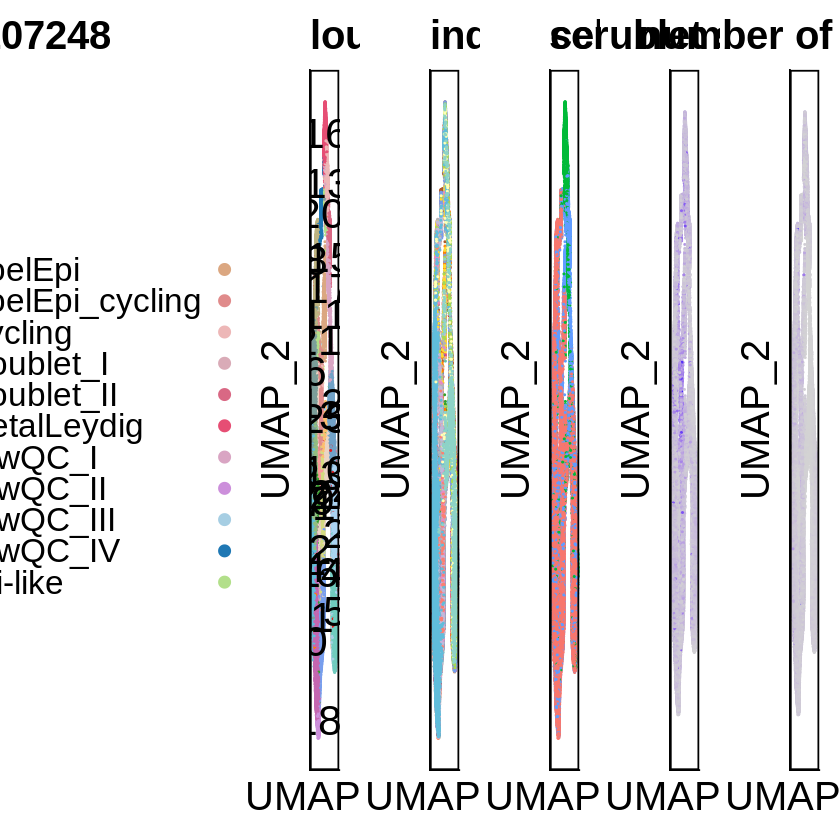

In [19]:
# Supporting cells A
anndataO = readRDS('/nfs/team292/lg18/with_valentina/supporting_doublets.rds')
plot_all_meta(anndataO)
ggsave(filename = paste0('figures_manual_annotation/FS1_supportingA.pdf'), dpi = 75, width = 32, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_supportingA.png'), dpi = 300, width = 32, height = 5)

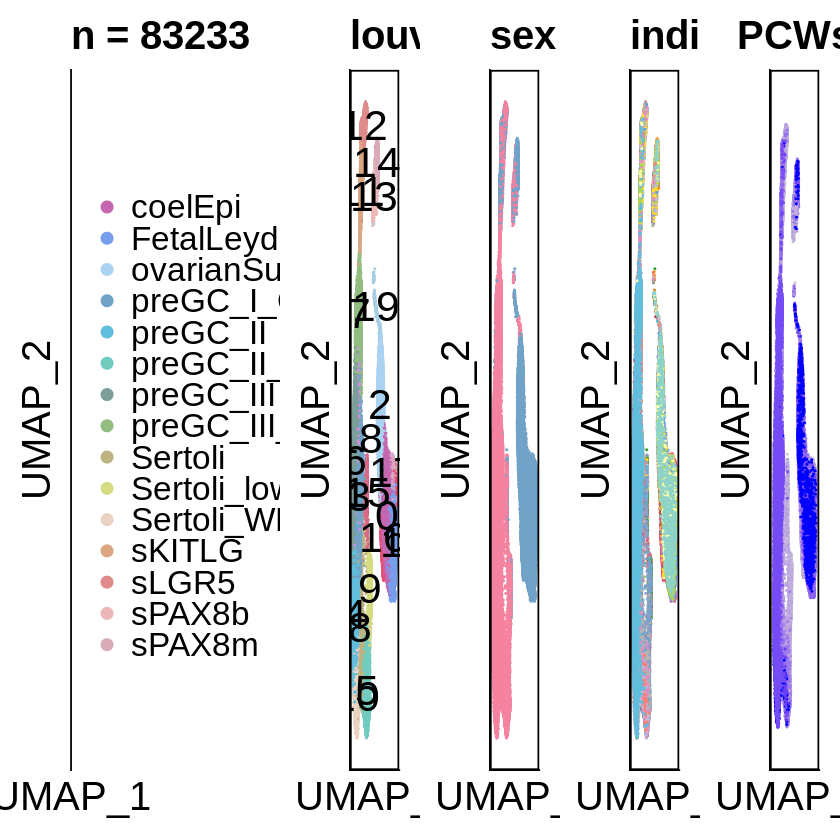

In [20]:
# Supporting b
anndataO = readRDS('/nfs/team292/lg18/with_valentina/supporting_nocycling.rds')
plot_all_meta(anndataO, output = 'round2')
ggsave(filename = paste0('figures_manual_annotation/FS1_supportingB.pdf'), dpi = 75, width = 27, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_supportingB.png'), dpi = 300, width = 27, height = 5)

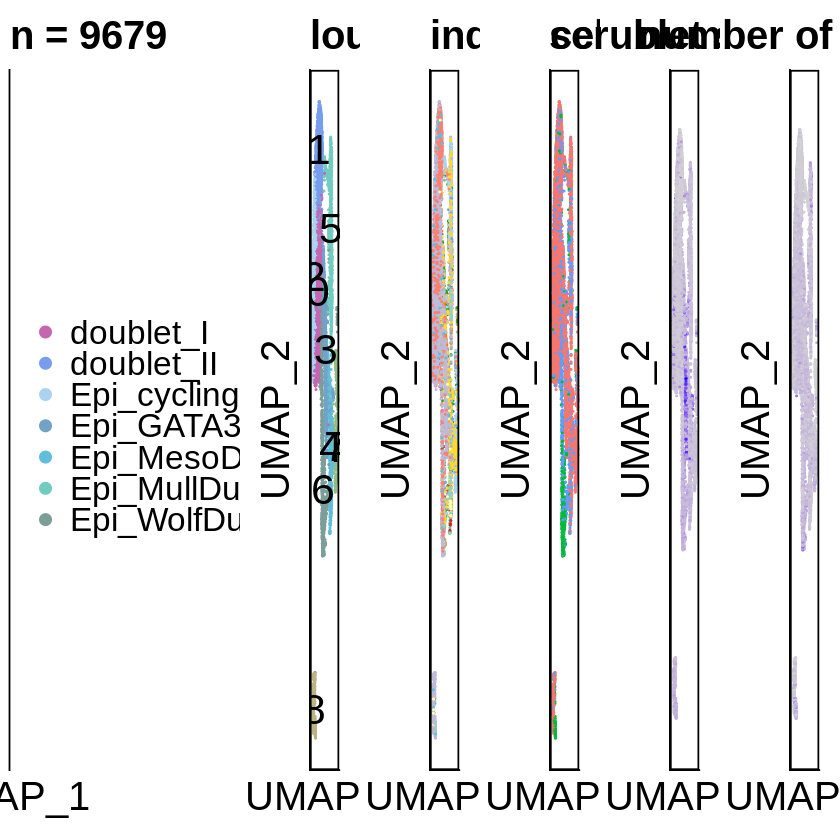

In [21]:
# epithelial A
anndataO = readRDS('/nfs/team292/lg18/with_valentina/epithelial_doublets.rds')
plot_all_meta(anndataO)
ggsave(filename = paste0('figures_manual_annotation/FS1_epithelialA.pdf'), dpi = 75, width = 32, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_epithelialA.png'), dpi = 300, width = 32, height = 5)

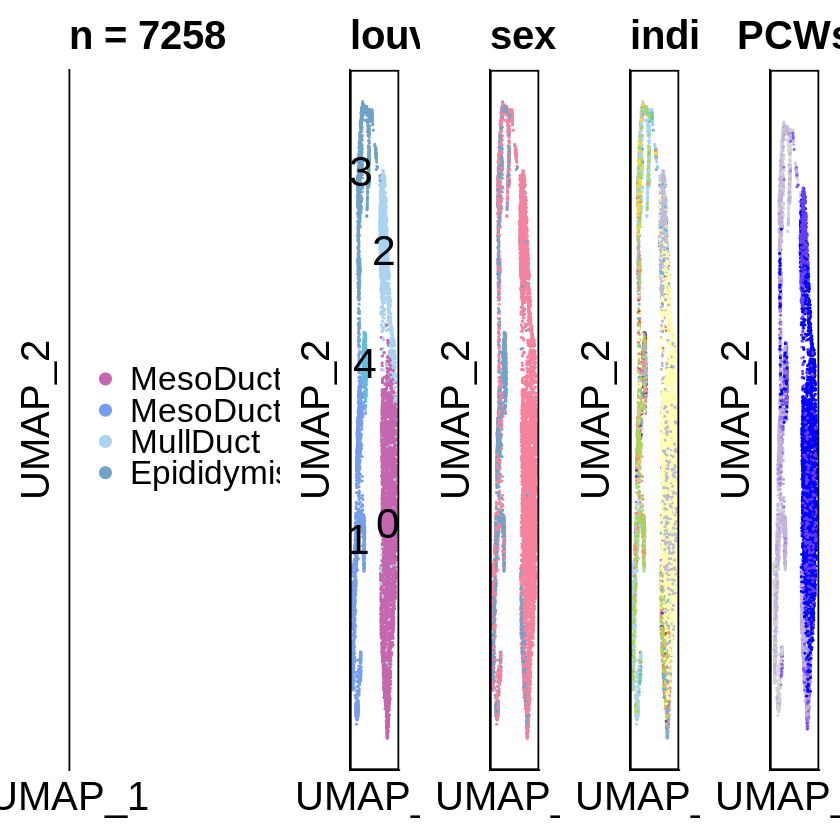

In [6]:
# epithelial b
anndataO = readRDS('/nfs/team292/lg18/with_valentina/epithelial.rds')
plot_all_meta(anndataO, output = 'round2')
ggsave(filename = paste0('figures_manual_annotation/FS1_epithelialB.pdf'), dpi = 75, width = 27, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_epithelialB.png'), dpi = 300, width = 27, height = 5)

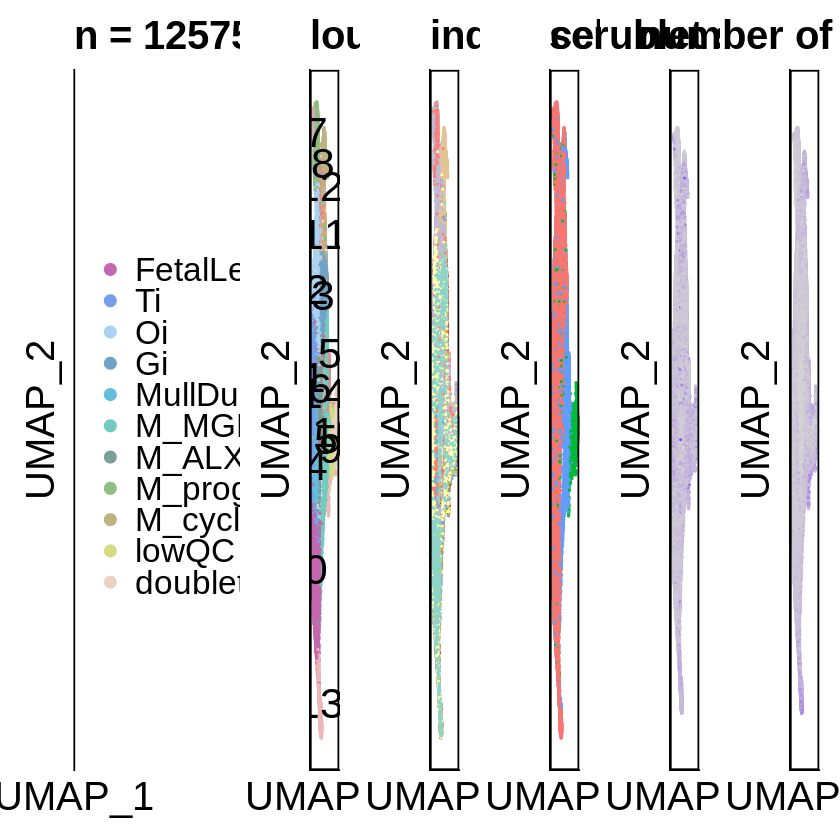

In [23]:
# mesenchymal A
anndataO = readRDS('/nfs/team292/lg18/with_valentina/mesenchymal_doublets.rds')
plot_all_meta(anndataO)
ggsave(filename = paste0('figures_manual_annotation/FS1_mesenchymalA.pdf'), dpi = 75, width = 32, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_mesenchymalA.png'), dpi = 300, width = 32, height = 5)

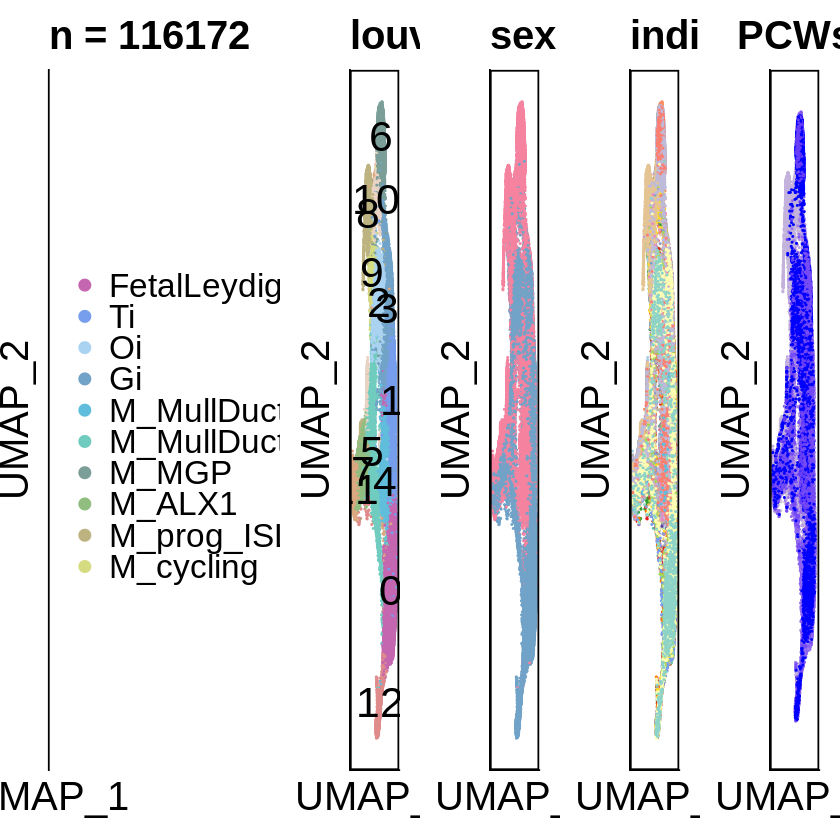

In [24]:
# mesenchymal b
anndataO = readRDS('/nfs/team292/lg18/with_valentina/mesenchymal.rds')
plot_all_meta(anndataO, output = 'round2')
ggsave(filename = paste0('figures_manual_annotation/FS1_mesenchymalB.pdf'), dpi = 75, width = 27, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_mesenchymalB.png'), dpi = 300, width = 27, height = 5)

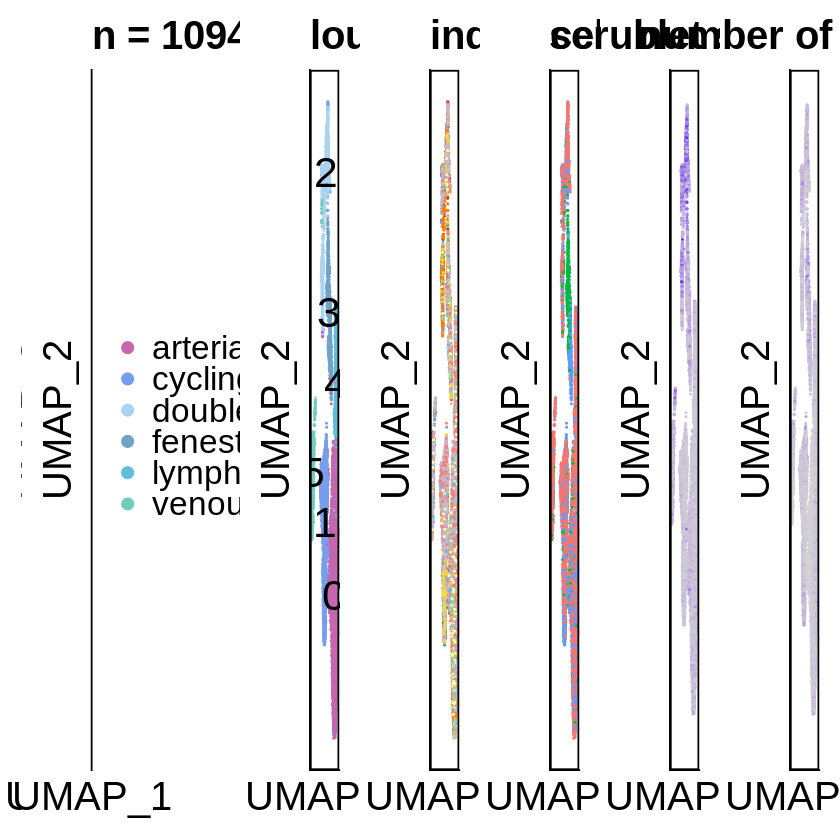

In [25]:
# endothelial A
anndataO = readRDS('/nfs/team292/lg18/with_valentina/endothelial_doublets.rds')
plot_all_meta(anndataO)
ggsave(filename = paste0('figures_manual_annotation/FS1_endothelialA.pdf'), dpi = 75, width = 32, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_endothelialA.png'), dpi = 300, width = 32, height = 5)

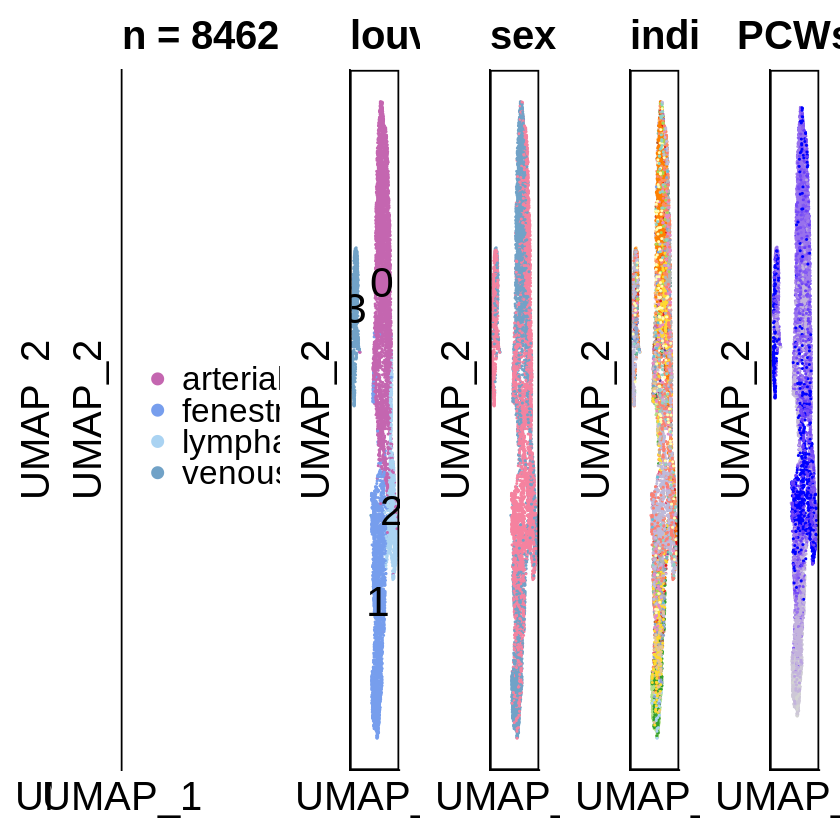

In [26]:
# endothelial b
anndataO = readRDS('/nfs/team292/lg18/with_valentina/endothelial_nocycling.rds')
plot_all_meta(anndataO, output = 'round2')
ggsave(filename = paste0('figures_manual_annotation/FS1_endothelialB.pdf'), dpi = 75, width = 27, height = 5)
ggsave(filename = paste0('figures_manual_annotation/FS1_endothelialB.png'), dpi = 300, width = 27, height = 5)